In [1]:
from subprocess import call
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shutil import copyfile, move, copy, copytree, rmtree
from distutils.dir_util import copy_tree
from IPython.display import clear_output
from tempfile import mkstemp
from os import fdopen, remove
from sklearn import metrics
import plotly
from ema_workbench import (RealParameter, IntegerParameter, BooleanParameter, ScalarOutcome, ArrayOutcome, Constant, Model, MultiprocessingEvaluator, Policy, perform_experiments, ema_logging )
from ema_workbench import (save_results, load_results, experiments_to_scenarios)
from ema_workbench.em_framework import (sample_uncertainties)
from sklearn.cluster import AgglomerativeClustering

from functools import partial
from multiprocessing import Pool, Lock
import seaborn as sns
%matplotlib inline
import plotly.express as px

import matplotlib.pyplot as plt
from scipy import stats

from numpy.lib import recfunctions as rf

import ema_workbench.analysis.cart as cart
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import (cart, RuleInductionType)

ema_logging.log_to_stderr(level=ema_logging.INFO)

import io
import math
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import tree


from ema_workbench.util.ema_exceptions import EMAError
from pygments.unistring import cats



import os

#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\chimp\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\chimp\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


### Load results

Or load only the experiments if file is to big. 

In [2]:
experimentsfile = pd.read_csv('E:/thesis_data/experimentsfinal.csv')
experimentsfile = experimentsfile.drop(['Unnamed: 0'], axis=1)
experimentsfile

Claimfile  Density  TigrisXLfile  agrclaim  inbreiding  natureclaim  \
0         False     True             1      True        True            3   
1         False    False             3     False       False            2   
2          True     True             2      True       False            2   
3          True    False             3     False        True            2   
4          True     True             3      True       False            3   
5          True    False             2      True       False            3   
6         False    False             3      True        True            3   
7          True     True             2      True       False            2   
8         False     True             2      True        True            1   
9         False     True             3     False        True            3   
10        False    False             3      True        True            3   
11        False    False             2      True       False            3   
12         True     True             2     False       False            3   
13         True     True             1      True       False            1   
14        False    False             4     False        True            1   
15        False    False             2      True       False            3   
16        False    False             4      True        True            3   
17        False    False             2      True        True            3   
18         True    False             3     False        True            3   
19        False     True             2      True       False            2   
20         True     True             2     False       False            1   
21         True    False             4      True        True            3   
22        False    False             3      True       False            3   
23         True    False             3     False       False            2   
24         True     True             3      True       False            1   
25         True     True             3      True        True            1   
26         True     True             2      True       False            1   
27        False    False             4     False       False            3   
28        False    False             3     False       False            1   
29        False     True             3      True        True            1   
...         ...      ...           ...       ...         ...          ...   
1970      False     True             4     False       False            1   
1971      False     True             1      True       False            3   
1972      False     True             1      True       False            3   
1973      False    False             1     False        True            1   
1974       True     True             2     False       False            1   
1975      False     True             4     False        True            2   
1976       True     True             1     False        True            3   
1977      False     True             3      True       False            3   
1978       True     True             3      True        True            3   
1979       True    False             1     False       False            2   
1980       True     True             3     False        True            2   
1981      False     True             3      True        True            3   
1982      False    False             3      True        True            3   
1983       True     True             3      True        True            2   
1984      False     True             1      True        True            3   
1985       True     True             2      True       False            2   
1986      False    False             4     False       False            1   
1987      False    False             2      True        True            2   
1988      False    False             4      True        True            1   
1989      False    False             4     False       False            1   
19

## CART


### Cluster the results 

In [3]:
map_list = []
for i in range(2000):
    name = 'map' + str(i)
    map_list.append(name)
    
# Kappa
kappa_df = pd.read_csv('E:/thesis_data/Output_DFs/kappa.csv', index_col= 'Unnamed: 0')
dist_kappa = 1 - kappa_df
# OA
oa_df = pd.read_csv('E:/thesis_data/Output_DFs/overallaccuracy_df.csv')
dist_oa = 1 - oa_df
# TAD
oad_df = pd.read_csv('E:/thesis_data/Output_DFs/overallallocationdifference_df.csv')
oad_df.index = map_list
np.fill_diagonal(oad_df.values, 0)

# Shannon
dist_shan = pd.read_csv('E:/thesis_data/Output_DFs/shannon_df.csv')
dist_shan.index = map_list

# Simpsons
dist_simp = pd.read_csv('E:/thesis_data/Output_DFs/simp_df.csv')
dist_simp.index = map_list

#Class 4 Residential
dist_tca4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA4_df.csv')
dist_tca4.index = map_list

dist_pland4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND4_df.csv')
dist_pland4.index = map_list

#Class 14  Corn
dist_tca14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA14_df.csv')
dist_tca14.index = map_list

dist_pland14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND14_df.csv')
dist_pland14.index = map_list

#Class 22 Nature
dist_tca22 = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_df.csv')
dist_tca22.index = map_list

dist_pland22 = pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_df.csv')
dist_pland22.index = map_list

# OD
dist_od = pd.read_csv('E:/thesis_data/Output_DFs/overalldifference_df.csv')
dist_od.index = map_list
np.fill_diagonal(dist_od.values, 0)

# OQD
oqd_df = pd.read_csv('E:/thesis_data/Output_DFs/overallquantitydifference_df.csv')
oqd_df.index = map_list
np.fill_diagonal(oqd_df.values, 0)

# OQD_22
qd22_df = pd.read_csv('E:/thesis_data/Output_DFs/quantitydifferencecategorical_22_df.csv')
np.fill_diagonal(qd22_df.values, 0)

### Define experiments
Because CART uses a ratio scale by default, on-hot encoder is performed to the categorical parameters. 

In [4]:
dfCART = experimentsfile
dfCART

Claimfile  Density  TigrisXLfile  agrclaim  inbreiding  natureclaim  \
0         False     True             1      True        True            3   
1         False    False             3     False       False            2   
2          True     True             2      True       False            2   
3          True    False             3     False        True            2   
4          True     True             3      True       False            3   
5          True    False             2      True       False            3   
6         False    False             3      True        True            3   
7          True     True             2      True       False            2   
8         False     True             2      True        True            1   
9         False     True             3     False        True            3   
10        False    False             3      True        True            3   
11        False    False             2      True       False            3   
12         True     True             2     False       False            3   
13         True     True             1      True       False            1   
14        False    False             4     False        True            1   
15        False    False             2      True       False            3   
16        False    False             4      True        True            3   
17        False    False             2      True        True            3   
18         True    False             3     False        True            3   
19        False     True             2      True       False            2   
20         True     True             2     False       False            1   
21         True    False             4      True        True            3   
22        False    False             3      True       False            3   
23         True    False             3     False       False            2   
24         True     True             3      True       False            1   
25         True     True             3      True        True            1   
26         True     True             2      True       False            1   
27        False    False             4     False       False            3   
28        False    False             3     False       False            1   
29        False     True             3      True        True            1   
...         ...      ...           ...       ...         ...          ...   
1970      False     True             4     False       False            1   
1971      False     True             1      True       False            3   
1972      False     True             1      True       False            3   
1973      False    False             1     False        True            1   
1974       True     True             2     False       False            1   
1975      False     True             4     False        True            2   
1976       True     True             1     False        True            3   
1977      False     True             3      True       False            3   
1978       True     True             3      True        True            3   
1979       True    False             1     False       False            2   
1980       True     True             3     False        True            2   
1981      False     True             3      True        True            3   
1982      False    False             3      True        True            3   
1983       True     True             3      True        True            2   
1984      False     True             1      True        True            3   
1985       True     True             2      True       False            2   
1986      False    False             4     False       False            1   
1987      False    False             2      True        True            2   
1988      False    False             4      True        True            1   
1989      False    False             4     False       False            1   
19

One-hot encode the variables which are categorical:

In [5]:
for scen in np.unique(dfCART['TigrisXLfile']):
    dfCART['TigrisXLfile_{}'.format(scen)] = dfCART['TigrisXLfile']== scen
    dfCART['TigrisXLfile_{}'.format(scen)] = dfCART['TigrisXLfile_{}'.format(scen)].astype(int)
del dfCART['TigrisXLfile']

for scen in np.unique(dfCART['natureclaim']):
    dfCART['natureclaim_{}'.format(scen)] = dfCART['natureclaim']==scen
    dfCART['natureclaim_{}'.format(scen)] = dfCART['natureclaim_{}'.format(scen)].astype(int)
del dfCART['natureclaim']

for scen in np.unique(dfCART['naturepolicymap']):
    dfCART['naturepolicymap_{}'.format(scen)] = dfCART['naturepolicymap']==scen
    dfCART['naturepolicymap_{}'.format(scen)] = dfCART['naturepolicymap_{}'.format(scen)].astype(int)
del dfCART['naturepolicymap']

for scen in np.unique(dfCART['valuenaturelocation']):
    dfCART['valuenaturelocation_{}'.format(scen)] = dfCART['valuenaturelocation']==scen
    dfCART['valuenaturelocation_{}'.format(scen)] = dfCART['valuenaturelocation_{}'.format(scen)].astype(int)
del dfCART['valuenaturelocation']

for scen in np.unique(dfCART['policyweightnature']):
    dfCART['policyweightnature_{}'.format(scen)] = dfCART['policyweightnature']==scen
    dfCART['policyweightnature_{}'.format(scen)] = dfCART['policyweightnature_{}'.format(scen)].astype(int)
del dfCART['policyweightnature']

In [6]:
dfCART

Claimfile  Density  agrclaim  inbreiding  pumping  recvalue  \
0         False     True      True        True     True      True   
1         False    False     False       False     True     False   
2          True     True      True       False    False      True   
3          True    False     False        True    False      True   
4          True     True      True       False     True     False   
5          True    False      True       False    False      True   
6         False    False      True        True     True     False   
7          True     True      True       False     True      True   
8         False     True      True        True    False     False   
9         False     True     False        True     True      True   
10        False    False      True        True     True      True   
11        False    False      True       False     True     False   
12         True     True     False       False     True     False   
13         True     True      True       False    False      True   
14        False    False     False        True    False      True   
15        False    False      True       False    False      True   
16        False    False      True        True    False      True   
17        False    False      True        True     True      True   
18         True    False     False        True     True     False   
19        False     True      True       False    False     False   
20         True     True     False       False     True     False   
21         True    False      True        True     True     False   
22        False    False      True       False    False     False   
23         True    False     False       False     True     False   
24         True     True      True       False     True      True   
25         True     True      True        True     True     False   
26         True     True      True       False    False     False   
27        False    False     False       False     True      True   
28        False    False     False       False    False      True   
29        False     True      True        True     True      True   
...         ...      ...       ...         ...      ...       ...   
1970      False     True     False       False     True      True   
1971      False     True      True       False    False      True   
1972      False     True      True       False    False     False   
1973      False    False     False        True    False      True   
1974       True     True     False       False     True     False   
1975      False     True     False        True    False     False   
1976       True     True     False        True     True     False   
1977      False     True      True       False     True     False   
1978       True     True      True        True     True      True   
1979       True    False     False       False    False      True   
1980       True     True     False        True     True      True   
1981      False     True      True        True    False      True   
1982      False    False      True        True     True     False   
1983       True     True      True        True    False     False   
1984      False     True      True        True     True      True   
1985       True     True      True       False    False     False   
1986      False    False     False       False     True     False   
1987      False    False      True        True    False     False   
1988      False    False      True        True     True     False   
1989      False    False     False       False    False     False   
1990       True     True      True        True    False      True   
1991      False    False     False       False     True     False   
1992       True    False      True        True     True      True   
1993      False    False     False        True     True     False   
1994      False    False      True       False     True      True   
1995       True    False      True       False    False      True   
1996

Switch true to fale, so the CART tree will make more sense (because CART views 1 and 0 the other way around):

In [7]:
dfCART = dfCART.replace({0:1, 1:0})

Rename driving forces:

In [8]:
dfCART = dfCART.rename(columns={'Claimfile' : 'Labour preferences', 'agrclaim' : 'Agriculture claim', 'inbreiding' : 'Spat. policy',
                      'policyweightnature' : 'Nature policy stimuli', 'pumping' : 'Pumping', 'recvalue' : 'Recreation claim',
                      'restrictionnatureweight' : 'Nature policy restriction', 'spreidingratio' : 'Scatter ratio',
                      'TigrisXLfile_1' : 'House Job claim 1', 'TigrisXLfile_2' : 'House Job claim 2', 'TigrisXLfile_3' : 'House Job claim 3',
                      'TigrisXLfile_4' : 'House Job claim 4', 'natureclaim_1' : 'Nature claim 1' , 'natureclaim_2' : 'Nature claim 2',
                      'natureclaim_3' : 'Nature claim 3', 'naturepolicymap_1' : 'Nature policy map 1', 'naturepolicymap_2' : 'Nature policy map 2',
                      'naturepolicymap_3' : 'Nature policy map 3', 'valuenaturelocation_1' : 'Value nature location 1', 'valuenaturelocation_2' : 'Value nature location 2','valuenaturelocation_3' : 'Value nature location 3'})

In [9]:
dfCART #where true = 0 and false = 1

Labour preferences  Density  Agriculture claim  Spat. policy  Pumping  \
0                      1        0                  0             0        0   
1                      1        1                  1             1        0   
2                      0        0                  0             1        1   
3                      0        1                  1             0        1   
4                      0        0                  0             1        0   
5                      0        1                  0             1        1   
6                      1        1                  0             0        0   
7                      0        0                  0             1        0   
8                      1        0                  0             0        1   
9                      1        0                  1             0        0   
10                     1        1                  0             0        0   
11                     1        1                  0             1        0   
12                     0        0                  1             1        0   
13                     0        0                  0             1        1   
14                     1        1                  1             0        1   
15                     1        1                  0             1        1   
16                     1        1                  0             0        1   
17                     1        1                  0             0        0   
18                     0        1                  1             0        0   
19                     1        0                  0             1        1   
20                     0        0                  1             1        0   
21                     0        1                  0             0        0   
22                     1        1                  0             1        1   
23                     0        1                  1             1        0   
24                     0        0                  0             1        0   
25                     0        0                  0             0        0   
26                     0        0                  0             1        1   
27                     1        1                  1             1        0   
28                     1        1                  1             1        1   
29                     1        0                  0             0        0   
...                  ...      ...                ...           ...      ...   
1970                   1        0                  1             1        0   
1971                   1        0                  0             1        1   
1972                   1        0                  0             1        1   
1973                   1        1                  1             0        1   
1974                   0        0                  1             1        0   
1975                   1        0                  1             0        1   
1976                   0        0                  1             0        0   
1977                   1        0                  0             1        0   
1978                   0        0                  0             0        0   
1979                   0        1                  1             1        1   
1980                   0        0                  1             0        0   
1981                   1        0                  0             0        1   
1982                   1        1                  0             0        0   
1983                   0        0                  0             0        1   
1984                   1        0                  0             0        0   
1985                   0        0                  0             1        1   
1986                   1        1                  1             1        0   
1987                   1        1                  0             0        1   
1988                   1        1                  0    

In [10]:
dfCART.columns

Index(['Labour preferences', 'Density', 'Agriculture claim', 'Spat. policy',
       'Pumping', 'Recreation claim', 'Nature policy restriction',
       'Scatter ratio', 'House Job claim 1', 'House Job claim 2',
       'House Job claim 3', 'House Job claim 4', 'Nature claim 1',
       'Nature claim 2', 'Nature claim 3', 'Nature policy map 1',
       'Nature policy map 2', 'Nature policy map 3', 'Value nature location 1',
       'Value nature location 2', 'Value nature location 3',
       'policyweightnature_1', 'policyweightnature_2', 'policyweightnature_3',
       'policyweightnature_4'],
      dtype='object')

### CART

In [12]:
kappaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit_predict(dist_kappa)
oaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit_predict(dist_oa)
odclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit_predict(dist_od)
oadclusters = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete').fit_predict(oad_df)
oqdclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit_predict(oqd_df)
qd22clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit_predict(qd22_df)
shannonclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit_predict(dist_shan)
simpsonclusters = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit_predict(dist_simp)
tca4clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit_predict(dist_tca4)
tca14clusters = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit_predict(dist_tca14)
tca22clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit_predict(dist_tca22)
pland4clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit_predict(dist_pland4)
pland14clusters = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit_predict(dist_pland14)
pland22clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit_predict(dist_pland22)

In [12]:
cart_kappa = cart.CART(dfCART, kappaclusters, mode = RuleInductionType.CLASSIFICATION)
cart_kappa.build_tree()
tree_kappa = cart_kappa.show_tree()
fig = plt.gcf()
fig.set_size_inches(300,300)

tree_kappa.savefig('E:/thesis_images/cart/kappa.png', bbox_inches="tight")
plt.show()

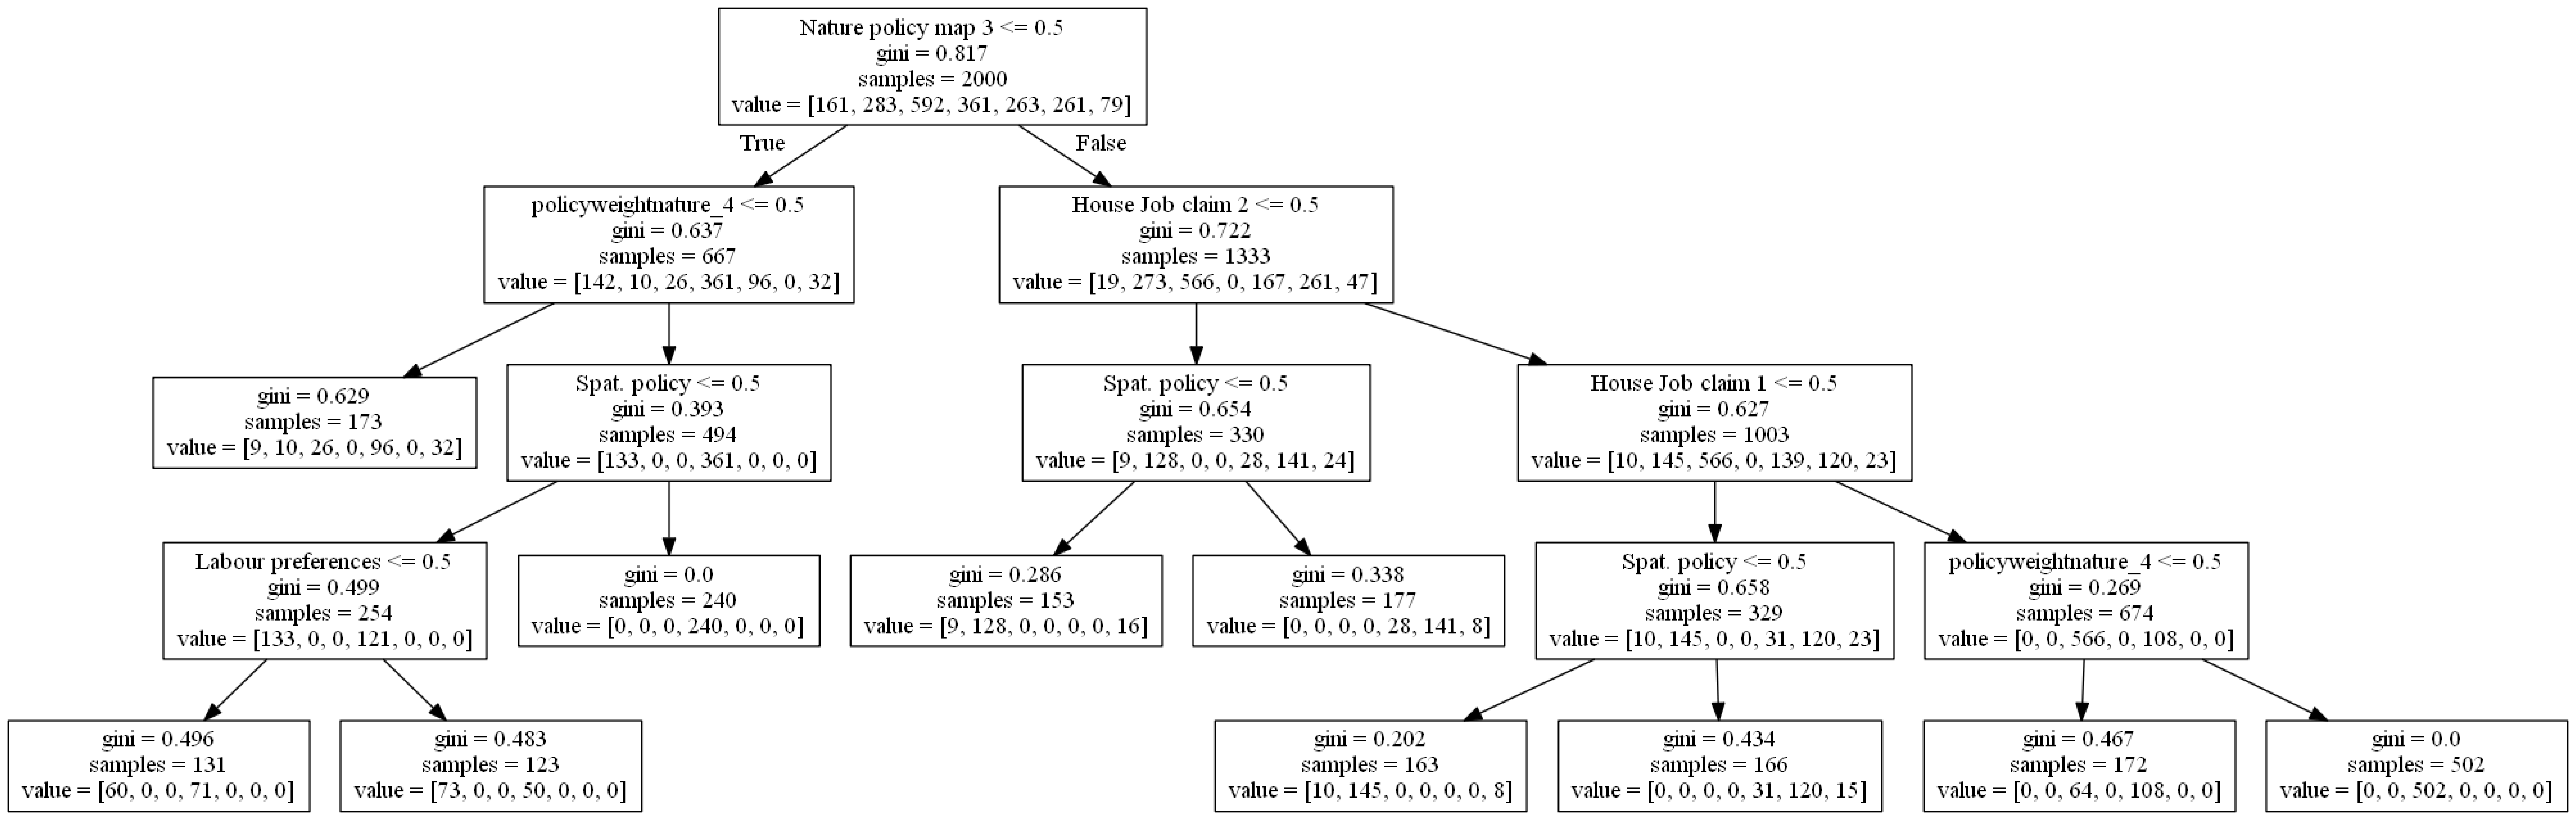

In [29]:
cart_od= cart.CART(dfCART, odclusters, mode=RuleInductionType.CLASSIFICATION)
cart_od.build_tree()

tree_od = cart_od.show_tree()
fig = plt.gcf()
fig.set_size_inches(200,200)
tree_od.savefig('E:/thesis_images/cart/od.png', bbox_inches="tight")
plt.show()

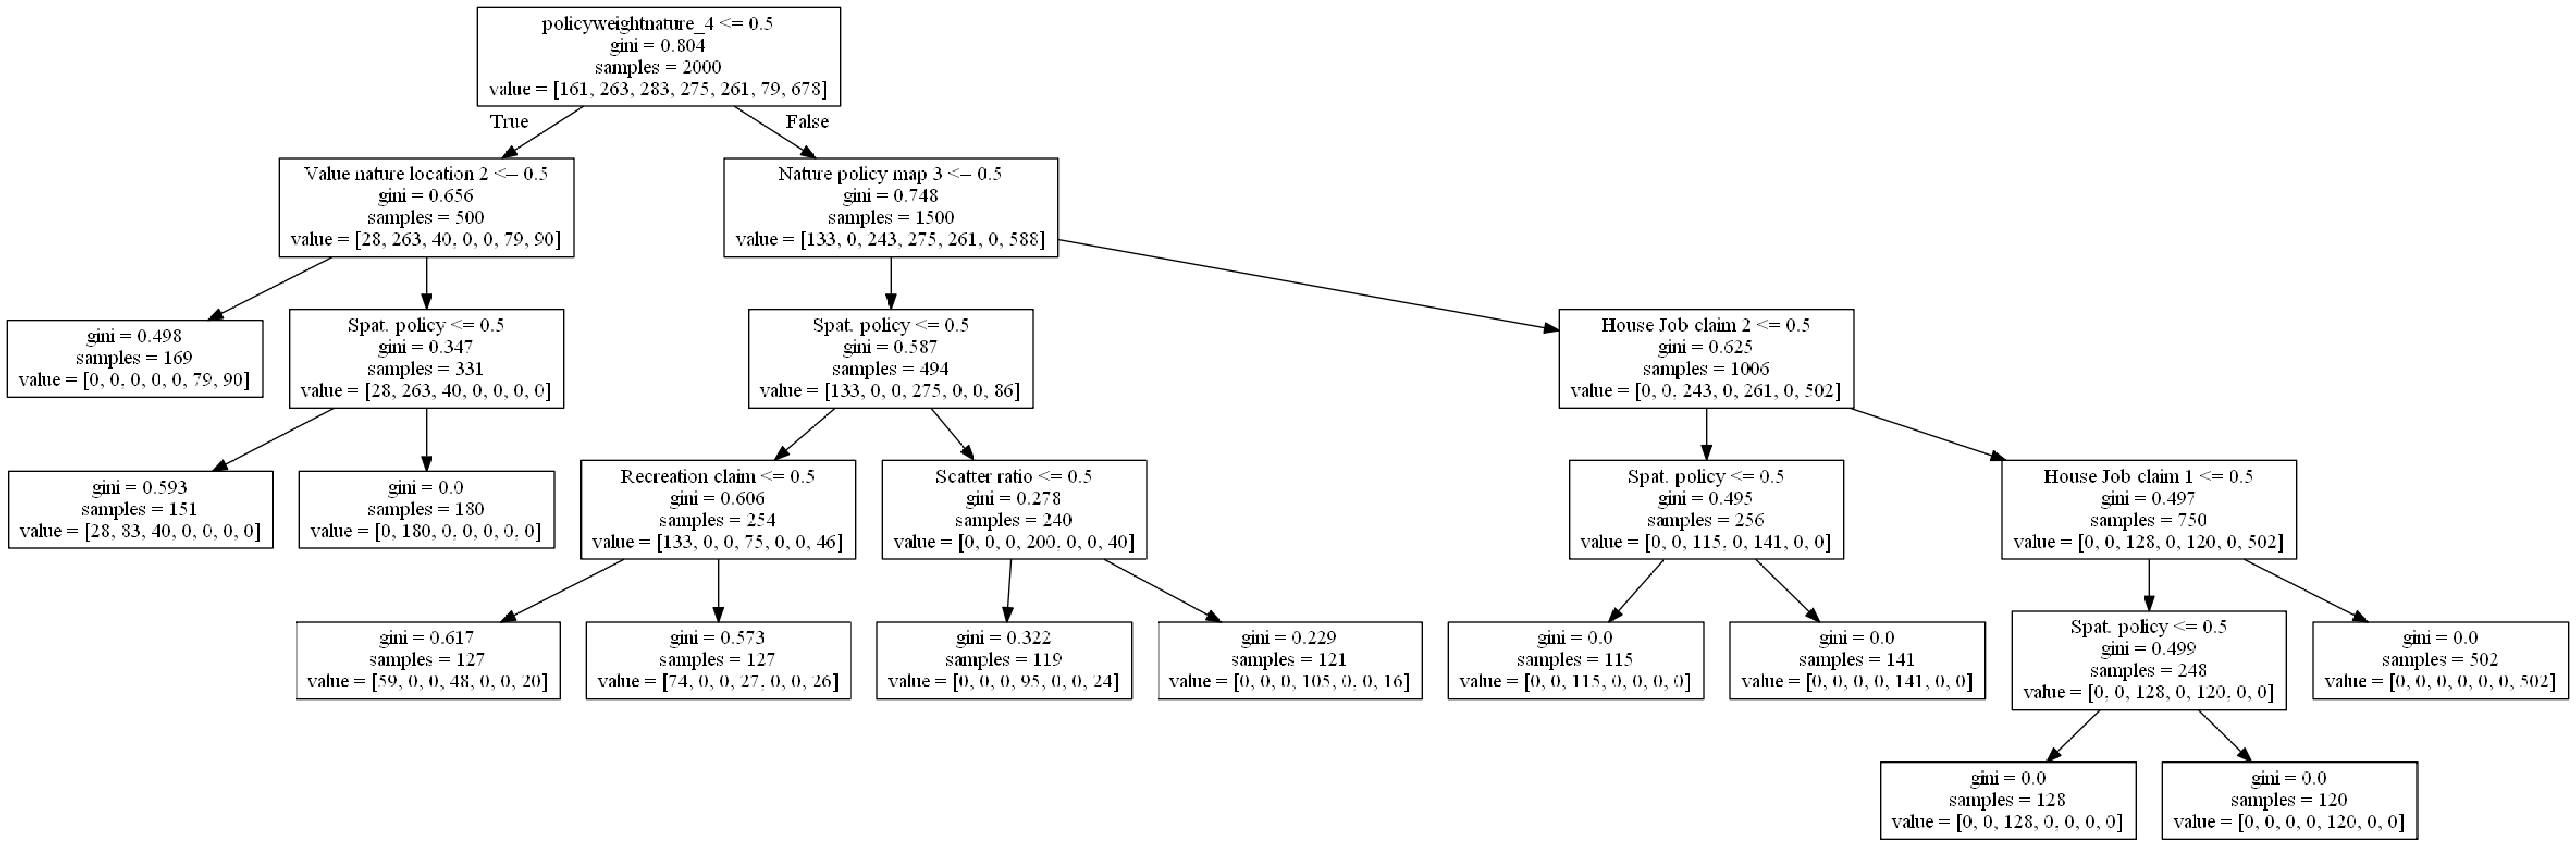

In [31]:
cart_oa= cart.CART(dfCART, oaclusters, mode=RuleInductionType.CLASSIFICATION)
cart_oa.build_tree()

tree_oa = cart_oa.show_tree()
fig = plt.gcf()
fig.set_size_inches(200,200)
tree_oa.savefig('E:/thesis_images/cart/oa.png', bbox_inches="tight")
plt.show()

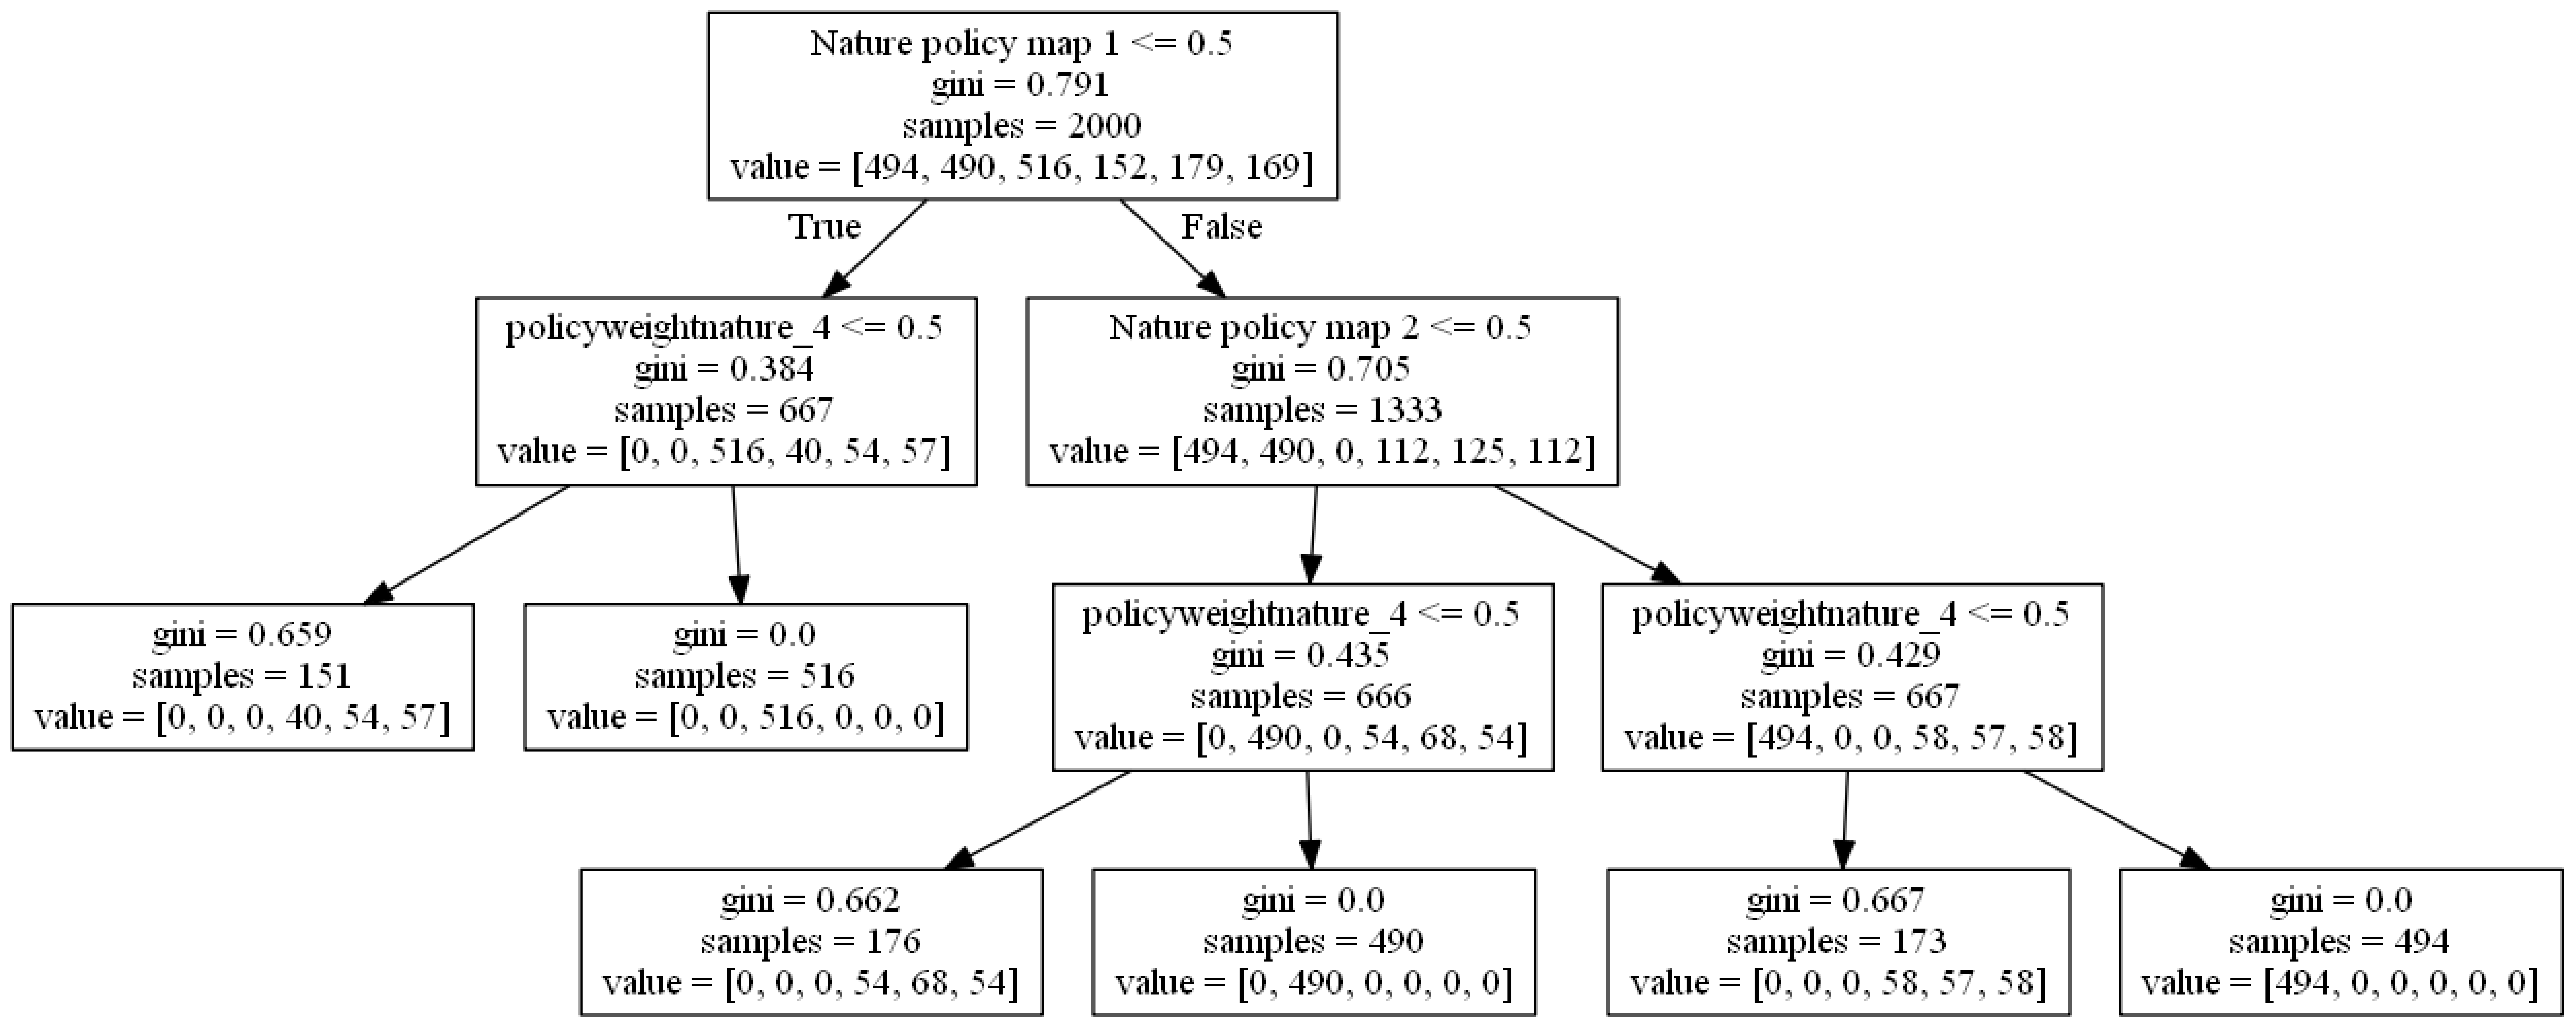

In [30]:
cart_oad= cart.CART(dfCART, oadclusters, mode=RuleInductionType.CLASSIFICATION)
cart_oad.build_tree()

tree_oad = cart_oad.show_tree()
fig = plt.gcf()
fig.set_size_inches(200,200)

tree_oad.savefig('E:/thesis_images/cart/oad.png', bbox_inches="tight")
plt.show()

In [27]:
cart_oqd= cart.CART(dfCART, oqdclusters, mode=RuleInductionType.CLASSIFICATION)
cart_oqd.build_tree()

tree_oqd = cart_oqd.show_tree()
fig = plt.gcf()
fig.set_size_inches(200,200)

tree_oqd.savefig('E:/thesis_images/cart/oqd.png', bbox_inches="tight")
plt.show()

In [26]:
cart_qd22= cart.CART(dfCART, qd22clusters, mode=RuleInductionType.CLASSIFICATION)
cart_qd22.build_tree()

tree_qd22 = cart_qd22.show_tree()
fig = plt.gcf()
fig.set_size_inches(200,200)

tree_qd22.savefig('E:/thesis_images/cart/qd22.png', bbox_inches="tight")
plt.show()

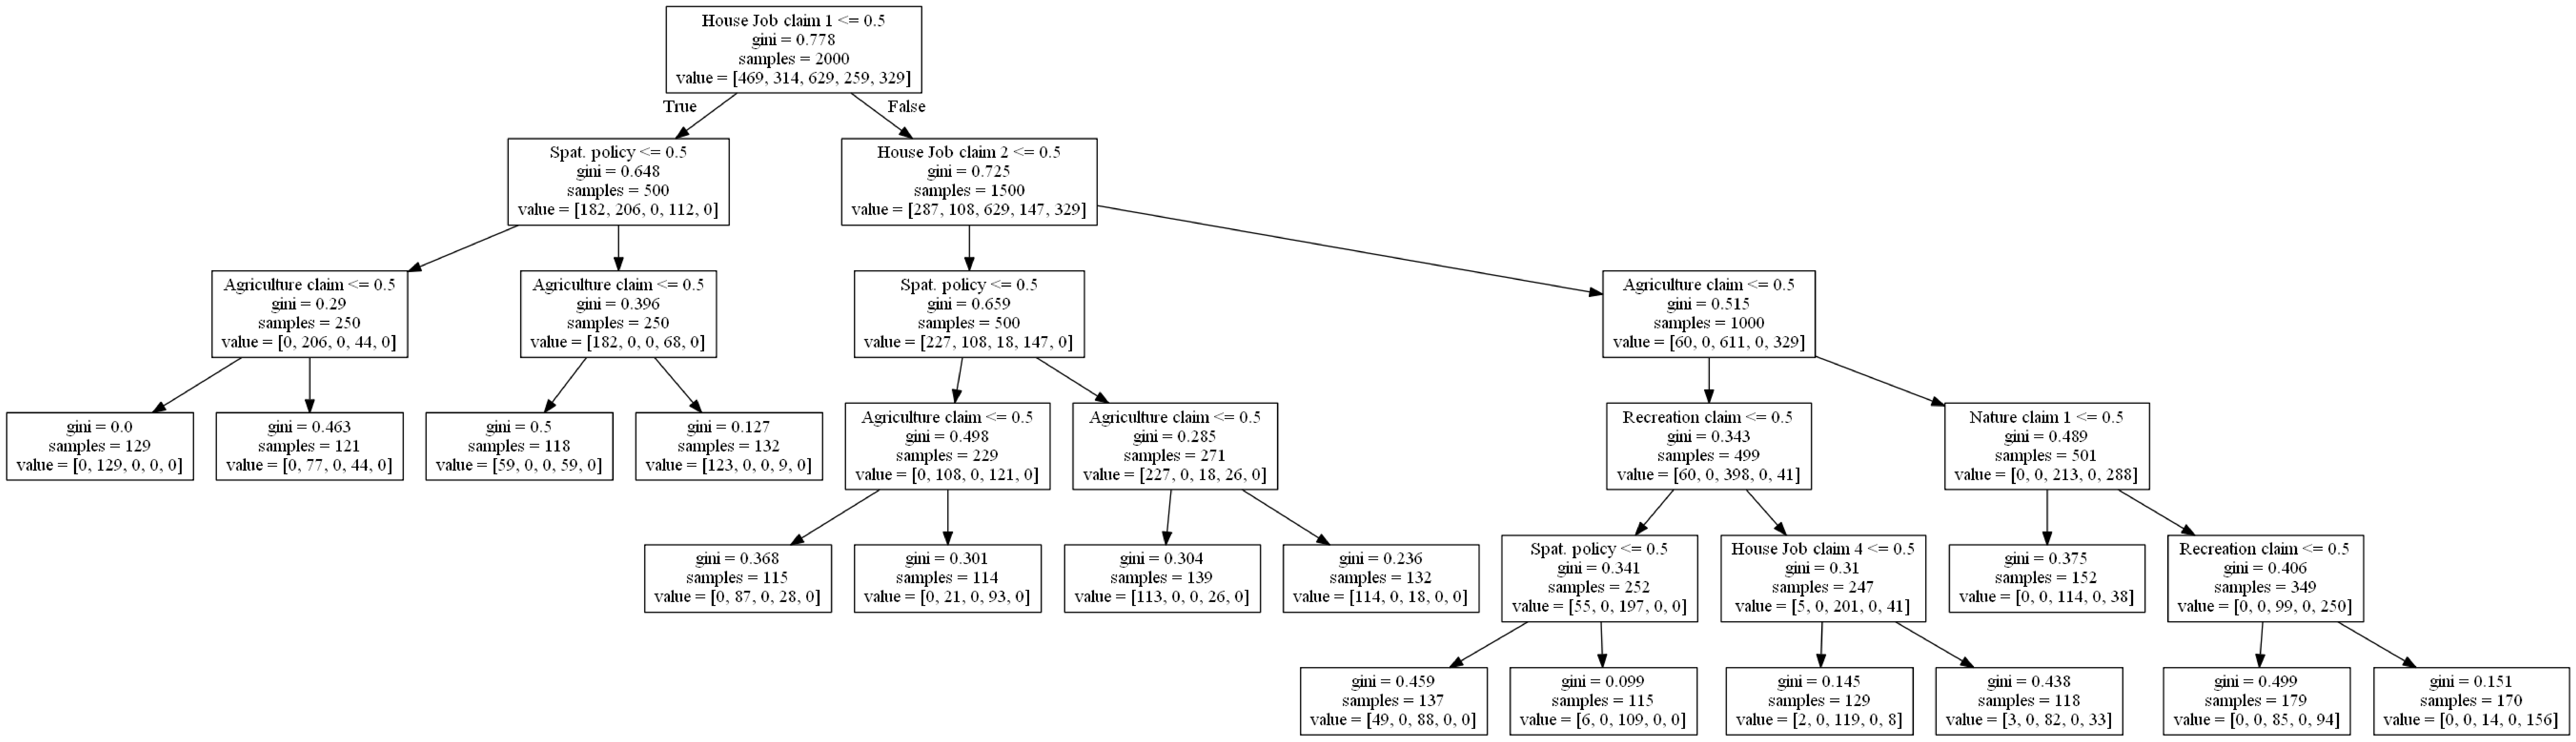

In [18]:
cart_simp= cart.CART(dfCART, simpsonclusters, mode=RuleInductionType.CLASSIFICATION)
cart_simp.build_tree()

tree_simp = cart_simp.show_tree()
fig_simp = plt.gcf()
fig_simp.set_size_inches(200,200)

tree_simp.savefig('E:/thesis_images/cart/simp.png', bbox_inches="tight")
plt.show()

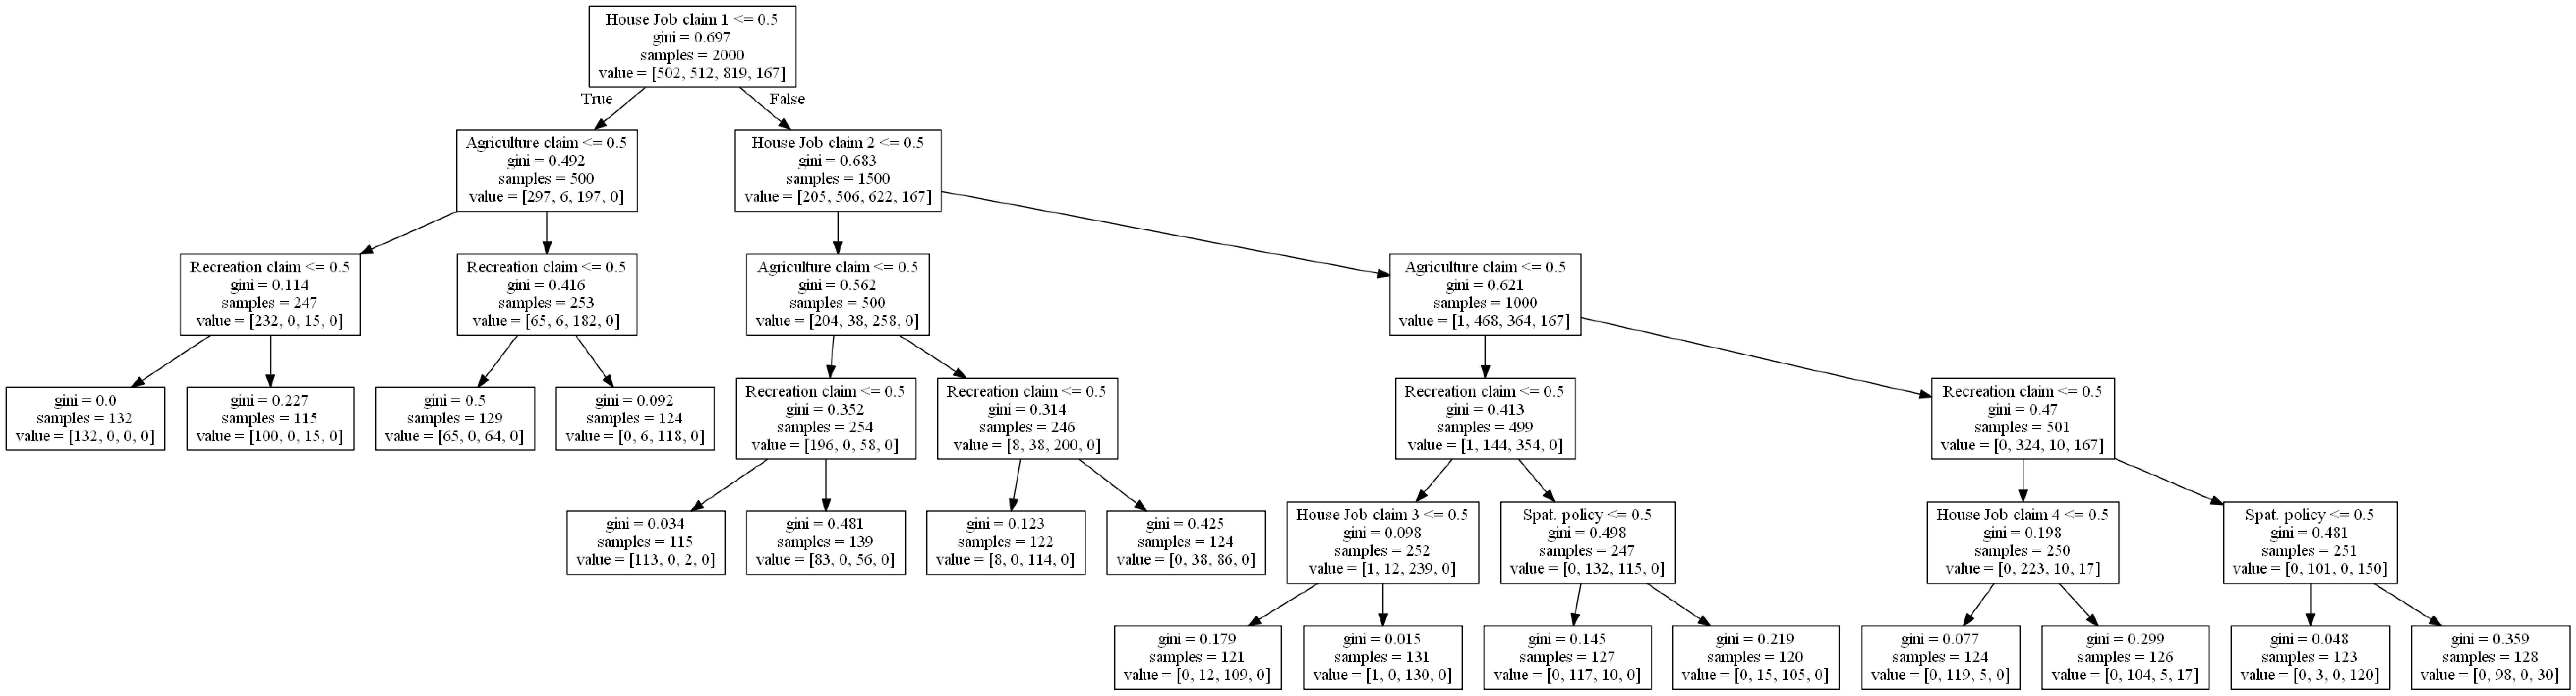

In [19]:
cart_shan= cart.CART(dfCART, shannonclusters, mode=RuleInductionType.CLASSIFICATION)
cart_shan.build_tree()

tree_shan = cart_shan.show_tree()
fig_shan = plt.gcf()
fig_shan.set_size_inches(200,200)

tree_shan.savefig('E:/thesis_images/cart/shan.png', bbox_inches="tight")
plt.show()

In [20]:
cart_tca4= cart.CART(dfCART, tca4clusters, mode=RuleInductionType.CLASSIFICATION)
cart_tca4.build_tree()

tree_tca4 = cart_tca4.show_tree()
fig_tca4 = plt.gcf()
fig_tca4.set_size_inches(200,200)

tree_tca4.savefig('E:/thesis_images/cart/tca4.png', bbox_inches="tight")
plt.show()

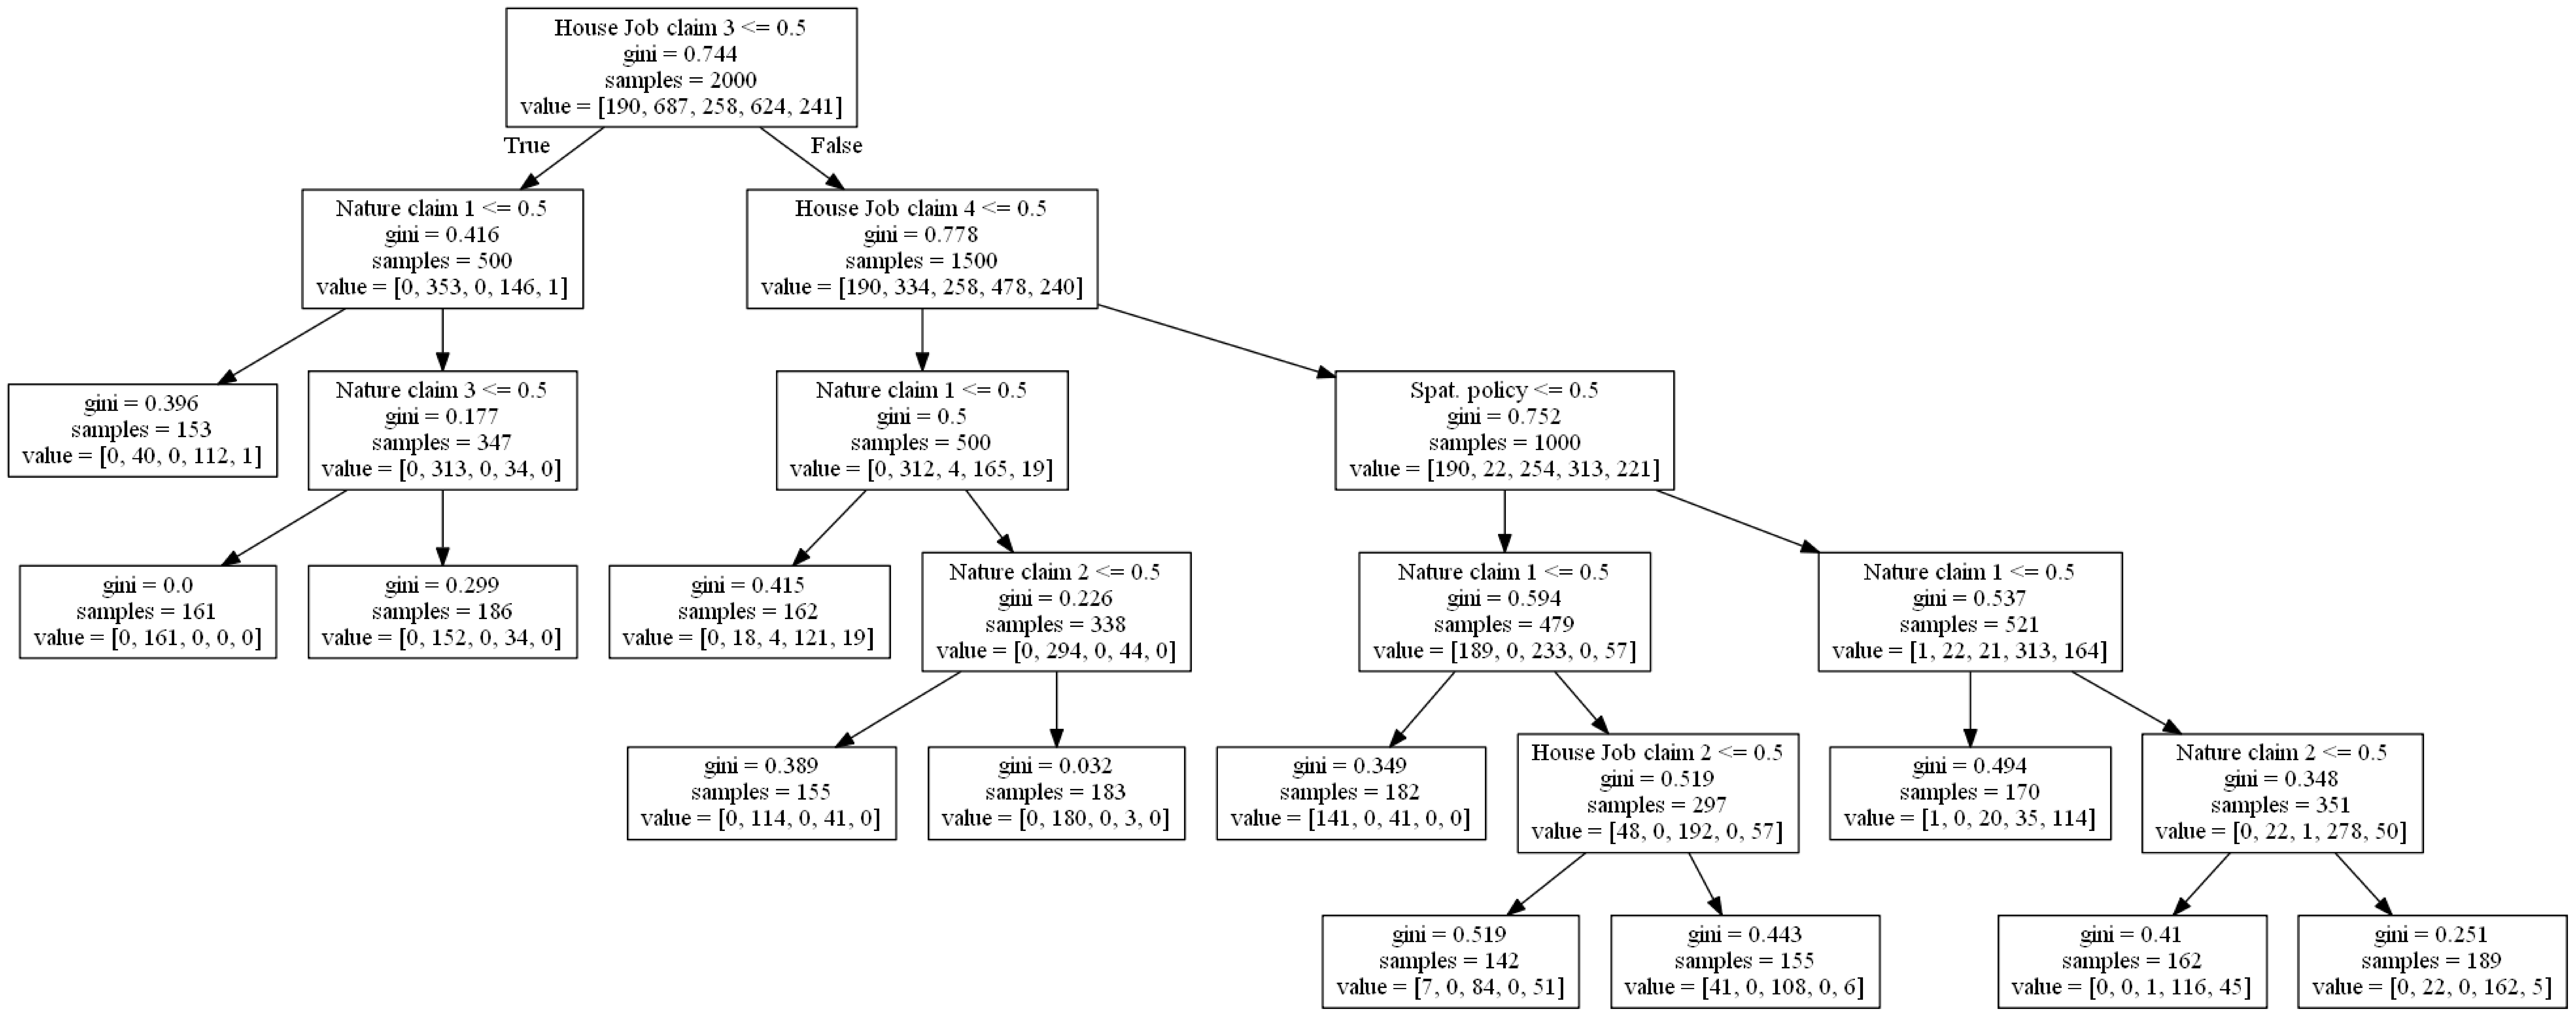

In [21]:
cart_tca14= cart.CART(dfCART, tca14clusters, mode=RuleInductionType.CLASSIFICATION)
cart_tca14.build_tree()

tree_tca14 = cart_tca14.show_tree()
fig_tca14 = plt.gcf()
fig_tca14.set_size_inches(200,200)

tree_tca14.savefig('E:/thesis_images/cart/tca14.png', bbox_inches="tight")
plt.show()

In [22]:
cart_tca22= cart.CART(dfCART, tca22clusters, mode=RuleInductionType.CLASSIFICATION)
cart_tca22.build_tree()

tree_tca22 = cart_tca22.show_tree()
fig_tca22 = plt.gcf()
fig_tca22.set_size_inches(200,200)

tree_tca22.savefig('E:/thesis_images/cart/tca22.png', bbox_inches="tight")
plt.show()

In [23]:
cart_pland4= cart.CART(dfCART, pland4clusters, mode=RuleInductionType.CLASSIFICATION)
cart_pland4.build_tree()

tree_pland4 = cart_pland4.show_tree()
fig_pland4 = plt.gcf()
fig_pland4.set_size_inches(200,200)

tree_pland4.savefig('E:/thesis_images/cart/pland4.png', bbox_inches="tight")
plt.show()

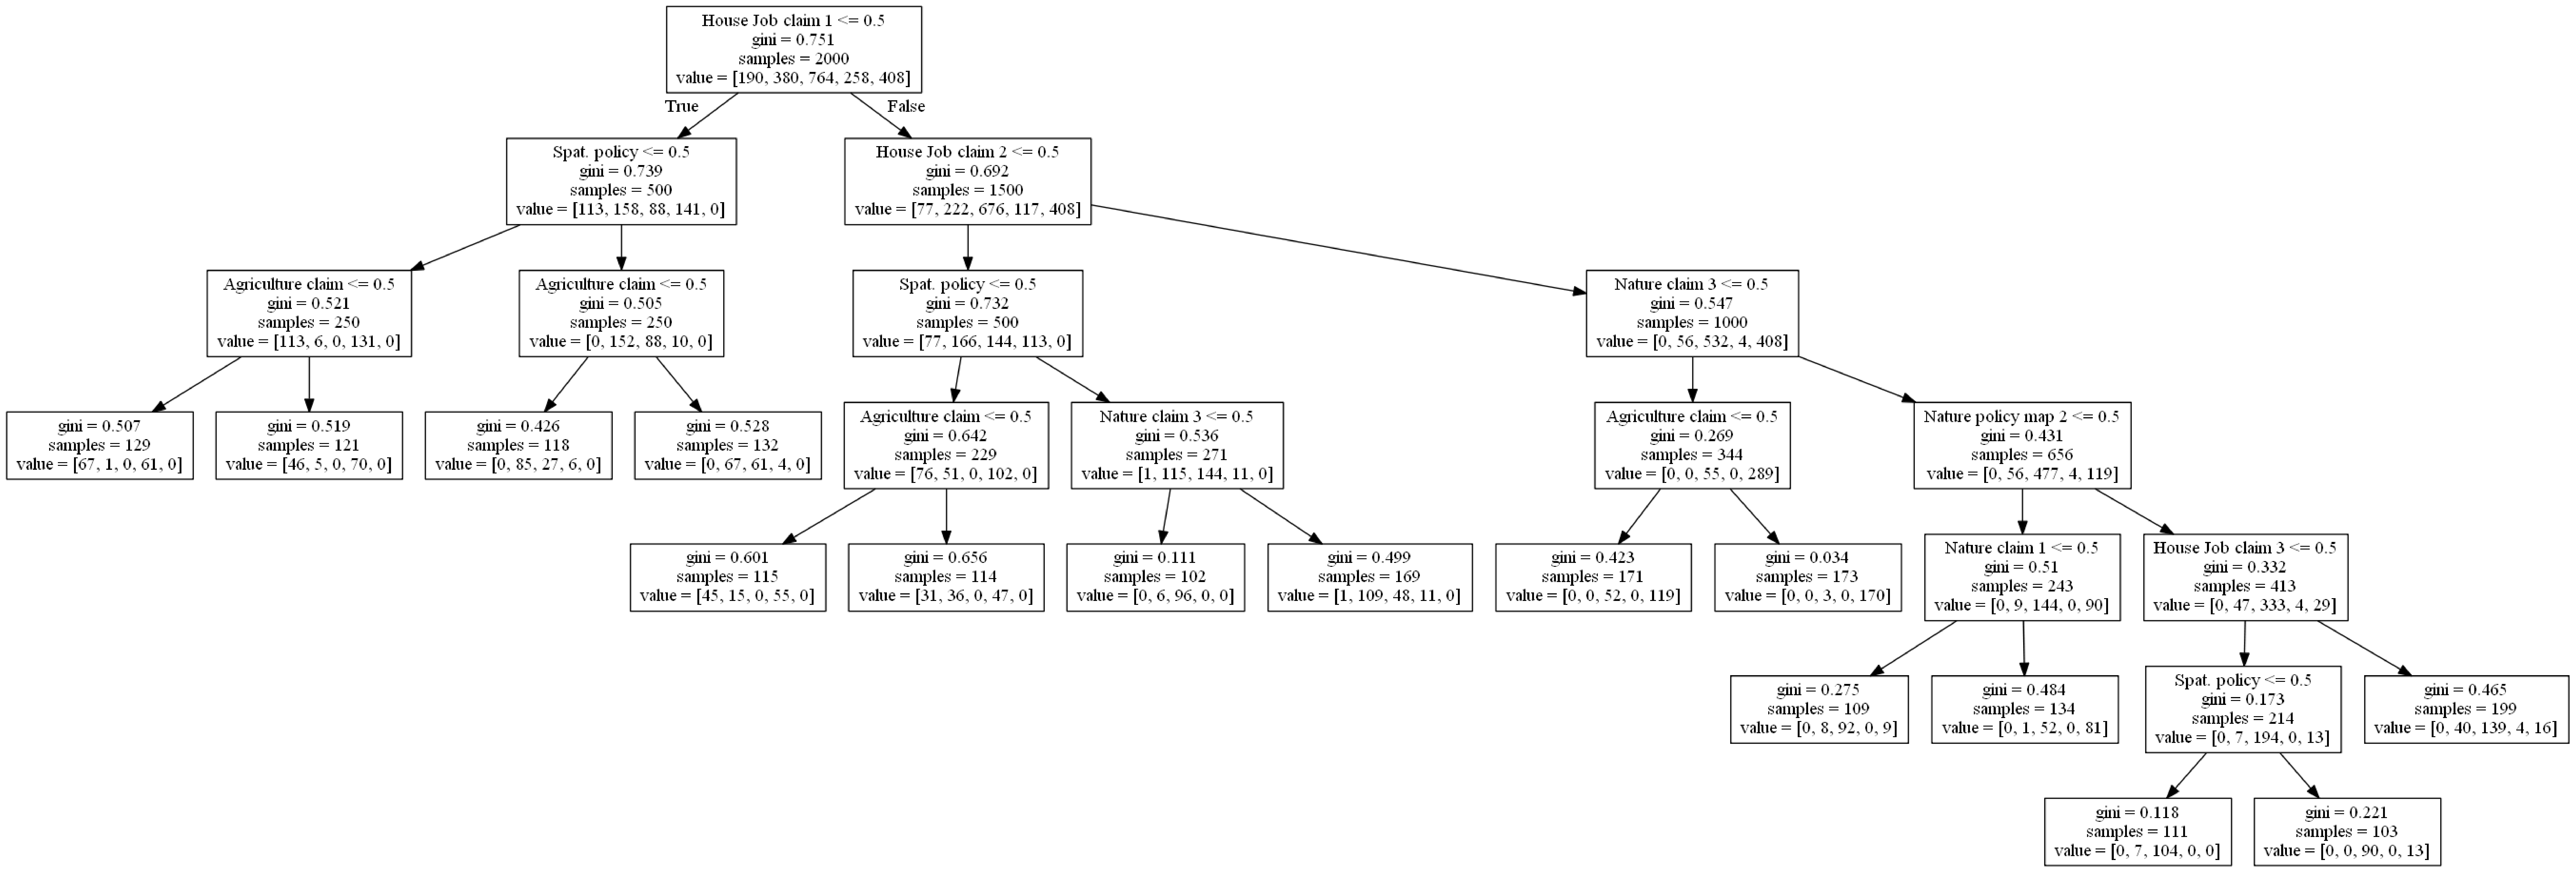

In [24]:
cart_pland14= cart.CART(dfCART, pland14clusters, mode=RuleInductionType.CLASSIFICATION)
cart_pland14.build_tree()

tree_pland14 = cart_pland14.show_tree()
fig_pland14 = plt.gcf()
fig_pland14.set_size_inches(200,200)

tree_pland14.savefig('E:/thesis_images/cart/pland14.png', bbox_inches="tight")
plt.show()

In [25]:
cart_pland22= cart.CART(dfCART, pland22clusters, mode=RuleInductionType.CLASSIFICATION)
cart_pland22.build_tree()

tree_pland22 = cart_pland22.show_tree()
fig_pland22 = plt.gcf()
fig_pland22.set_size_inches(200,200)

tree_pland22.savefig('E:/thesis_images/cart/pland22.png', bbox_inches="tight")
plt.show()

In [ ]:
cart_qd22= cart.CART(dfCART, qd22clusters, mode=RuleInductionType.CLASSIFICATION)
cart_qd22.build_tree()

tree_qdd22 = cart_qd22.show_tree()
fig_qd22 = plt.gcf()
fig_qd22.set_size_inches(200,200)

tree_qd22.savefig('E:/thesis_images/cart/qd22.png', bbox_inches="tight")
plt.show()